https://3months.tistory.com/168

## 데이터 확인 및 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cansim-0800020-eng-6674700030567901031.csv', skiprows=6, skipfooter=9, engine='python')

In [3]:
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [4]:
from pandas.tseries.offsets import MonthEnd ## 월별끝일 삽입

df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')

print(df.head())

             Unadjusted  Seasonally adjusted
Adjustments                                 
1991-01-31     12588862             15026890
1991-02-28     12154321             15304585
1991-03-31     14337072             15413591
1991-04-30     15108570             15293409
1991-05-31     17225734             15676083


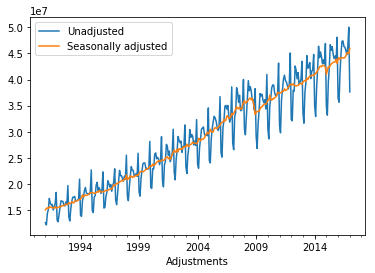

In [5]:
df.plot()

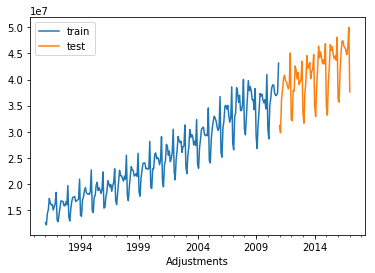

In [6]:
split_date = pd.Timestamp('01-01-2011')
# 2011/1/1 까지의 데이터를 트레이닝셋.
# 그 이후 데이터를 테스트셋으로 만든다.

train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]

# Feature는 Unadjusted 한 개
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [7]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

test_sc

array([[0.61423187],
       [0.56926634],
       [0.77259579],
       [0.83505683],
       [0.89993326],
       [0.92552046],
       [0.89302107],
       [0.88363094],
       [0.86220767],
       [0.84048091],
       [0.87180554],
       [1.06265011],
       [0.65198848],
       [0.6431242 ],
       [0.83176496],
       [0.82666946],
       [0.98182284],
       [0.95616179],
       [0.90265615],
       [0.94107108],
       [0.86841056],
       [0.88189991],
       [0.90152769],
       [1.01100691],
       [0.69112114],
       [0.6285977 ],
       [0.81975104],
       [0.8791154 ],
       [1.04612377],
       [0.96841925],
       [0.97644296],
       [1.00288811],
       [0.90392615],
       [0.94879721],
       [0.95953255],
       [1.05319955],
       [0.7364742 ],
       [0.66953725],
       [0.84874774],
       [0.95681131],
       [1.10426647],
       [1.03325855],
       [1.06896205],
       [1.03909791],
       [0.9957921 ],
       [1.0202471 ],
       [0.99420458],
       [1.120

In [8]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], 
                           index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], 
                          index=test.index)

In [9]:
train_sc_df.head()

,Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


## pandas shift를 통해 window 생성
shift는 이전 정보 다음에 row에서 다시 쓰기 위한 pandas의 함수이다.  
이를 통해 아래와 같이 과거의 값들을 shift_s와 같은 형태로 저장할 수 있다.  
과거값은 총 12개를 저장하며, timestep은 12개가 된다.  
우리의 목적은 과거값 shift1~12를 통해 현재값 Scaled를 예측하는 것이다.  

In [10]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [11]:
train_sc_df.describe()

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
count,240.000000,239.000000,238.000000,237.000000,236.000000,235.000000,234.000000,233.000000,232.000000,231.000000,230.000000,229.000000,228.000000
mean,0.420985,0.418563,0.416898,0.415272,0.413646,0.411940,0.410008,0.408054,0.406160,0.404522,0.403080,0.402519,0.401664
std,0.241028,0.238588,0.237695,0.236869,0.236042,0.235085,0.233712,0.232292,0.230983,0.230130,0.229584,0.229929,0.230070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.211260,0.210050,0.208841,0.207631,0.207044,0.206457,0.205870,0.205282,0.204648,0.204014,0.203380,0.202746,0.202611
50%,0.387050,0.383386,0.383247,0.383108,0.382566,0.382023,0.380370,0.378716,0.376887,0.375058,0.373580,0.372102,0.371540
75%,0.600857,0.599528,0.598398,0.597349,0.595715,0.593959,0.592390,0.591318,0.591266,0.590253,0.587838,0.589258,0.584998
max,1.000000,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722


## 트레이닝셋과 테스트셋 만들기

In [12]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
X_train.tail()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,
2010-08-31,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687,0.754447,0.770968
2010-09-30,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687,0.754447
2010-10-31,0.799167,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687
2010-11-30,0.802101,0.799167,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290
2010-12-31,0.814829,0.802101,0.799167,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722


In [13]:
y_train = train_sc_df.dropna()[['Scaled']]
y_train.tail()

,Scaled
Adjustments,
2010-08-31,0.814394
2010-09-30,0.799167
2010-10-31,0.802101
2010-11-30,0.814829
2010-12-31,1.000000


In [14]:
X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [15]:
X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,
1992-01-31,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020
1992-02-29,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000
1992-03-31,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426
1992-04-30,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318
1992-05-31,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628


In [16]:
y_train.head()

,Scaled
Adjustments,
1992-01-31,0.030027
1992-02-29,0.019993
1992-03-31,0.065964
1992-04-30,0.109831
1992-05-31,0.149130


# 다시 ndarray로 변환

In [17]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [18]:
X_train.shape
# X_train?

(228, 12)

In [19]:
print(y_train.shape)
# y_train

(228, 1)


## 최종 트레이닝셋과 테스트셋의 X의 만들기

keras에서는 RNN계열의 모델을 트레이닝할 때 요구되는 데이터의 형식이 있다.  
바로 3차원 데이터여야하며, 각각의 차원은(size, timestep, feature)와 같은 순서대로 나타내주어야 한다.  
따라서 이 형태로 데이터를 reshape해줘야 한다.  
일반적인 MLP모델에서는 size와 feature만 있기 때문에 2차원이지만, RNN에서는 "시간"이라는 개념이 생기면서 한차원이 증가된것이다.  
합리적인 데이터 구조라고 볼 수 있다.  

In [20]:
X_train.shape[0]

228

In [21]:
X_train.shape[0]

228

In [22]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

In [23]:
X_train_t.shape

(228, 12, 1)

## LSTM 모델 만들기

In [24]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [25]:
K.clear_session()
model = Sequential() # Sequeatial Model
model.add(LSTM(20, input_shape=(12, 1))) #(timestep, feature)
model.add(Dense(1)) # output = 1

In [26]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [27]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(X_train_t, y_train, epochs=100, batch_size=30, verbose=1)

Epoch 1/100
228/228 [==============================] - 3s 12ms/step - loss: 0.0924
Epoch 2/100
228/228 [==============================] - 0s 1ms/step - loss: 0.0296
Epoch 3/100
228/228 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 4/100
228/228 [==============================] - 0s 999us/step - loss: 0.0138
Epoch 5/100
228/228 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 6/100
228/228 [==============================] - 0s 999us/step - loss: 0.0092
Epoch 7/100
228/228 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 8/100
228/228 [==============================] - 0s 995us/step - loss: 0.0079
Epoch 9/100
228/228 [==============================] - 0s 982us/step - loss: 0.0077
Epoch 10/100
228/228 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 11/100
228/228 [==============================] - 0s 982us/step - loss: 0.0073
Epoch 12/100
228/228 [==============================] - 0s 1ms/step - loss: 0.0072
Ep

In [28]:
print(X_test_t.shape)

(61, 12, 1)


In [29]:
y_pred = model.predict(X_test_t)
print(y_pred.shape)

(61, 1)


In [33]:
# y_test

In [34]:
# y_test

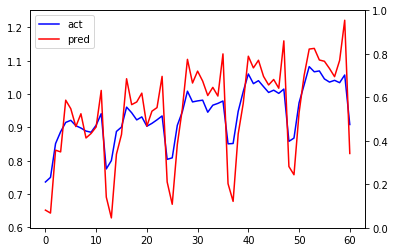

In [37]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

pred = y_pred

loss_ax.plot(pred, 'b', label='act')

loss_ax.plot(y_test, 'r', label='pred')

loss_ax.legend(loc='upper left')

plt.show()